In [149]:
import os
os.getcwd()

'/Users/paramshah/Documents/Param/NYU/courses/Machine Learning/Project/Github Team/covid-19/notebooks'

In [150]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
app_dir = '/Users/paramshah/Documents/Param/NYU/courses/Machine Learning/Project/Github Team/covid-19'

In [151]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging/unified.csv'))
us_df = df[df['country_region'] == 'United States']

In [152]:
df.dtypes

country_region                                         object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
C1_School closing                                     float64
C2_Workplace closing                                  float64
C3_Cancel public events                               float64
C4_Restrictions on gatherings                         float64
C5_Close public transport                             float64
C6_Stay at home requirements                          float64
C7_Restrictions on internal movement                  float64
C8_International travel controls                      float64
E1_Incom

In [153]:
TRAIN_COLUMNS = [
    # 'country_region',
    # 'date',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
    'C1_School closing',
    'C2_Workplace closing',
    'C3_Cancel public events',
    'C4_Restrictions on gatherings',
    'C5_Close public transport',
    'C6_Stay at home requirements',
    'C7_Restrictions on internal movement',
    'C8_International travel controls',
    'E1_Income support',
    'E2_Debt/contract relief',
    'H1_Public information campaigns',
    'H2_Testing policy',
    'H3_Contact tracing',
    'StringencyIndex'
]

TARGET_COLUMNS = [
    'cases'
]

In [154]:
us_df['cases']

850         13
851         13
852         13
853         13
854         13
        ...   
930    1204351
931    1229331
932    1257023
933    1283929
934    1309550
Name: cases, Length: 85, dtype: int64

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm import tqdm
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [8]:
cases=us_df['cases'].dropna().values
model = pm.auto_arima(cases, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, with_intercept=False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

NameError: name 'pm' is not defined

In [26]:
from pmdarima.arima import auto_arima

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm import tqdm
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [157]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging/jhu_cases.csv'))
df['date'] = pd.to_datetime(df['date'])
df

,country,date,cases
0,United States,2020-01-22,1
1,United States,2020-01-23,1
2,United States,2020-01-24,2
3,United States,2020-01-25,2
4,United States,2020-01-26,5
...,...,...,...
1249,Brazil,2020-05-10,162699
1250,Brazil,2020-05-11,169594
1251,Brazil,2020-05-12,178214
1252,Brazil,2020-05-13,190137


In [158]:
df['country'].unique()

array(['United States', 'India', 'Italy', 'Canada', 'Spain', 'France',
       'United Kingdom', 'Iraq', 'Japan', 'Germany', 'Brazil'],
      dtype=object)

In [159]:
app_dir = '/Users/paramshah/Documents/Param/NYU/courses/Machine Learning/Project/Github Team/covid-19'

In [160]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging/unified.csv'))
us_df = df[df['country_region'] == 'United States']

In [161]:
us_df['date'] =  pd.to_datetime(us_df['date'])

/usr/local/anaconda3/envs/ml_project/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
us_df['date'].unique()

array(['2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18T00:00:00.000000000',
       '2020-02-19T00:00:00.000000000', '2020-02-20T00:00:00.000000000',
       '2020-02-21T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
       '2020-02-23T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
       '2020-02-25T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
       '2020-02-27T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-12T00:00:00.000000000', '2020-03-13

In [124]:
train_subset = us_df[us_df['date'] <= '2020-04-15']

In [125]:
train_subset

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C1_School closing,C2_Workplace closing,...,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,StringencyIndex,cases,deaths,recovered
850,United States,2020-02-15,6.073507,2.225115,5.158882,1.633614,0.360260,-0.191041,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.56,13,0,3
851,United States,2020-02-16,7.348642,2.333067,5.500399,1.421326,0.386581,-0.217652,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.56,13,0,3
852,United States,2020-02-17,3.351574,-0.296495,6.552217,0.668455,-17.336910,2.294349,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.56,13,0,3
853,United States,2020-02-18,-0.170090,-1.094775,1.335495,0.843243,-0.005405,0.455856,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.56,13,0,3
854,United States,2020-02-19,1.836030,0.497663,1.990651,0.935994,0.869831,0.102481,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,5.56,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,United States,2020-04-11,-26.697785,-2.072948,0.664785,-17.232740,-30.474598,4.279635,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,526396,24342,31270
907,United States,2020-04-12,-37.612701,-22.853757,-8.661002,-20.994633,-39.269678,3.541145,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,555313,26086,32988
908,United States,2020-04-13,-18.783150,-8.395308,-5.771063,-13.861713,-40.252755,8.317810,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,580619,27870,43482
909,United States,2020-04-14,-16.752920,-5.776283,-0.221593,-11.555044,-39.037876,8.366372,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,607670,30262,47763


In [126]:
test_subset = us_df[us_df['date'] > '2020-04-15']

In [127]:
test_subset

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C1_School closing,C2_Workplace closing,...,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,StringencyIndex,cases,deaths,recovered
911,United States,2020-04-16,-15.058074,-3.597380,-0.176346,-11.899788,-38.691218,8.411473,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,667592,34827,54703
912,United States,2020-04-17,-19.536201,-6.432616,-1.640860,-13.552688,-37.963799,8.790323,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,699706,37411,58545
913,United States,2020-04-18,-24.138986,-6.045892,-1.217657,-14.474650,-25.943619,4.198427,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,732197,39753,64840
914,United States,2020-04-19,-21.766880,-8.817062,2.725365,-16.427464,-30.455748,3.296077,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,758809,40945,70337
915,United States,2020-04-20,-13.950142,-5.269943,1.987892,-11.548433,-36.500000,7.548433,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,71.58,784326,42659,72329
916,United States,2020-04-21,-14.081206,-4.156028,1.502128,-10.327660,-37.845035,7.952482,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,68.41,811865,45086,75204
917,United States,2020-04-22,-14.399505,-3.991861,0.827318,-10.355272,-38.216207,8.023355,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,68.41,840351,47412,77366
918,United States,2020-04-23,-16.265675,-4.602196,-1.144527,-11.315267,-38.517180,8.514346,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,68.41,869170,49724,80203
919,United States,2020-04-24,-17.986375,-5.129079,0.476873,-12.219433,-37.232700,8.404087,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,68.41,905358,51493,99079
920,United States,2020-04-25,-21.929355,-4.084686,6.011409,-12.247916,-25.014919,3.793330,3.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,68.41,938154,53755,100372


In [128]:
import pmdarima.arima as pm

In [129]:
cases=train_subset['cases'].dropna().values
model = pm.auto_arima(cases, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, with_intercept=False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Fit ARIMA: order=(0, 2, 0); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0); AIC=1063.130, BIC=1067.285, Fit time=0.007 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1063.138, BIC=1067.293, Fit time=0.006 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1062.530, BIC=1068.762, Fit time=0.016 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1062.053, BIC=1070.363, Fit time=0.059 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1065.996, BIC=1078.461, Fit time=0.135 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1061.624, BIC=1067.857, Fit time=0.043 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1064.462, BIC=1072.772, Fit time=0.047 seconds
Fit ARIMA: order=(2, 2, 2); AIC=1063.998, BIC=1074.385, Fit time=0.085 seconds
Total fit time: 0.410 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -527.812
Method:                       css-

In [135]:
# Forecast cases
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True,alpha=0.2)
# make series for plotting purpose
fc = pd.DataFrame(fc,columns = ['Prediction'])

test_subset=test_subset[test_subset['date']>train_subset['date'].max()].reset_index()
date=test_subset['date']
lower_series = pd.DataFrame(confint[:, 0],columns = ['Linf'])
upper_series = pd.DataFrame(confint[:, 1],columns = ['Lsup'])

fc=pd.concat([fc,lower_series,upper_series,date],axis=1)
fc.set_index([ 'date'], inplace=True)

train = train_subset.copy()
train.set_index(['date'], inplace=True)
train=train.dropna()

test = test_subset.copy()
test.set_index(['date'], inplace=True)
test=test.dropna()

In [138]:
train_subset['date'].min()

Timestamp('2020-02-15 00:00:00')

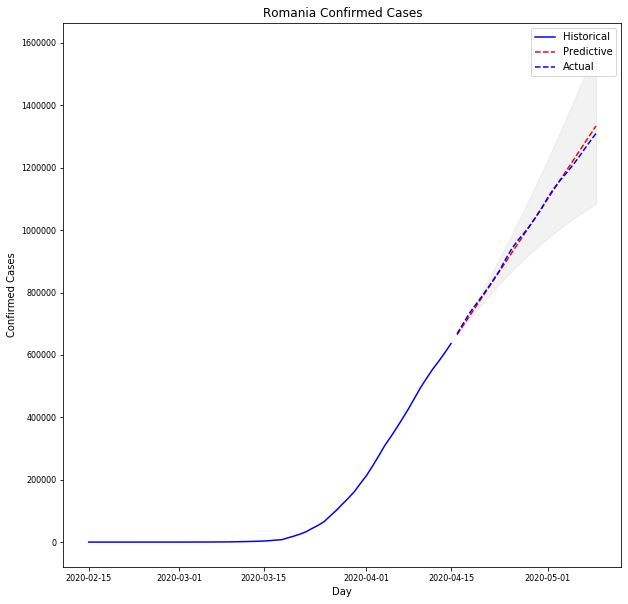

In [137]:
# Plot
plt.figure(figsize=(10,10))

plt.title('Romania Confirmed Cases')
plt.plot(train.cases,label='Historical',color='blue')
plt.plot(fc.Prediction,label='Predictive',color='red',linestyle='--')
plt.plot(test.cases,label='Actual',color='blue',linestyle='--')
plt.fill_between(fc.index, 
                 fc.Linf, 
                 fc.Lsup, 
                 color='k', alpha=.05)
plt.xlabel('Day',fontsize=10)
plt.ylabel('Confirmed Cases',fontsize=10)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
# plt.yscale('log')
plt.legend()


plt.show()

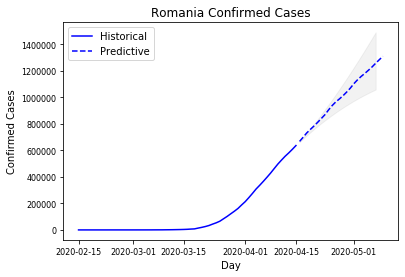

In [133]:
# Plot
plt.title('Romania Confirmed Cases')
plt.plot(train.cases,label='Historical',color='blue')
plt.plot(test.cases,label='Predictive',color='blue',linestyle='--')
plt.fill_between(fc.index, 
                 fc.Linf, 
                 fc.Lsup, 
                 color='k', alpha=.05)
plt.xlabel('Day',fontsize=10)
plt.ylabel('Confirmed Cases',fontsize=10)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.legend()


plt.show()